📌 Columns in dataset:
Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

🔹 First 5 rows:
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  

🔍 Mis

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


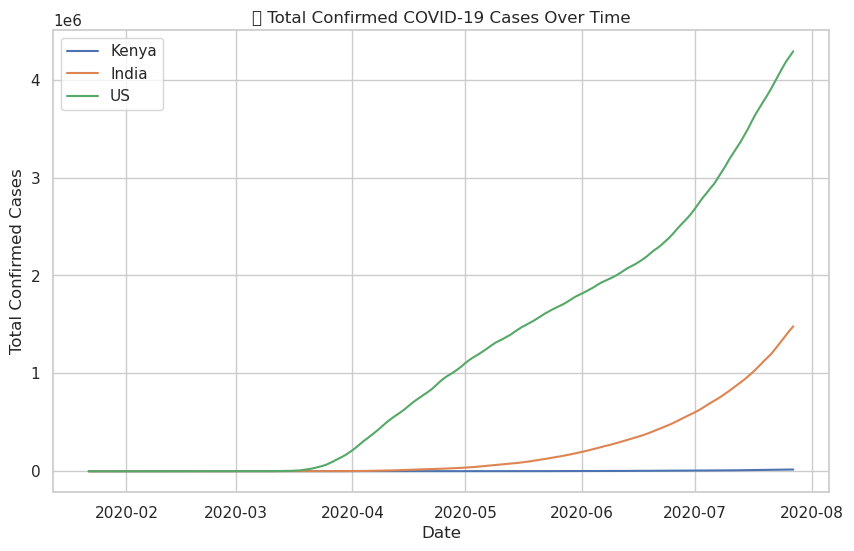

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128128 (\N{SKULL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


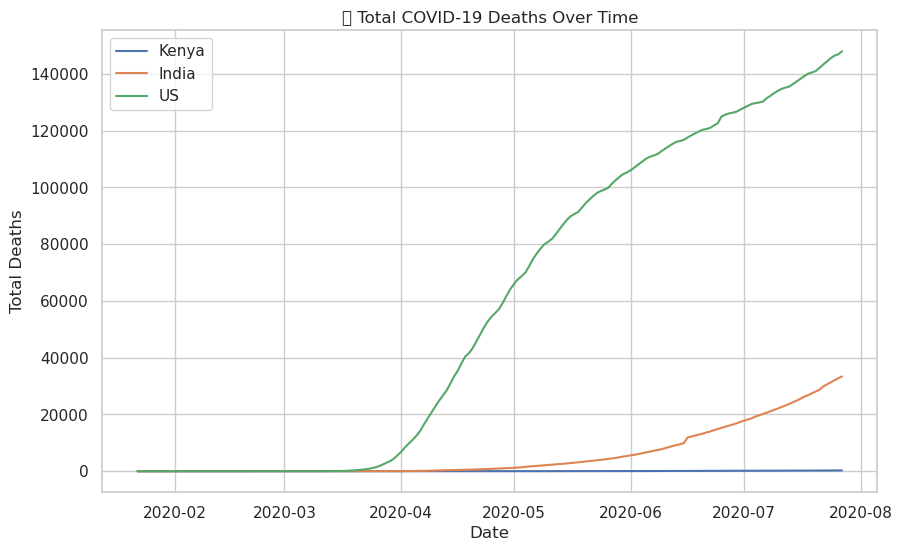

/tmp/ipykernel_1248/2444657558.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Death Rate"] = df_selected["Deaths"] / df_selected["Confirmed"].replace(0, pd.NA)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


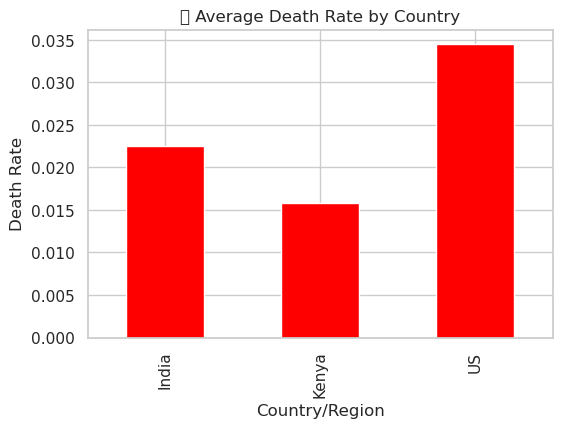

⚠️ Vaccination data not available in this dataset.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# --------------------------------------------
# 2️⃣ Data Loading & Exploration
# --------------------------------------------

# Load the dataset
df = pd.read_csv("covid_19_clean_complete.csv")

# View column names
print("📌 Columns in dataset:")
print(df.columns)

# View the first few rows
print("\n🔹 First 5 rows:")
print(df.head())

# Check for missing values
print("\n🔍 Missing values:")
print(df.isnull().sum())

# --------------------------------------------
# 3️⃣ Data Cleaning
# --------------------------------------------

# Convert 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows with missing critical values (e.g., Date, Confirmed, Country)
df.dropna(subset=["Date", "Confirmed", "Country/Region"], inplace=True)

# Fill missing values in numeric columns with 0
df[["Deaths", "Recovered", "Active"]] = df[["Deaths", "Recovered", "Active"]].fillna(0)

# Filter for selected countries
countries = ["Kenya", "India", "US"]
df_selected = df[df["Country/Region"].isin(countries)]

# --------------------------------------------
# 4️⃣ Exploratory Data Analysis (EDA)
# --------------------------------------------

# Total confirmed cases over time for selected countries
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_selected[df_selected["Country/Region"] == country].groupby("Date")["Confirmed"].sum()
    plt.plot(country_data, label=country)
plt.title("📈 Total Confirmed COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.legend()
plt.show()

# Total deaths over time
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_selected[df_selected["Country/Region"] == country].groupby("Date")["Deaths"].sum()
    plt.plot(country_data, label=country)
plt.title("💀 Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()

# Death rate = Deaths / Confirmed
df_selected["Death Rate"] = df_selected["Deaths"] / df_selected["Confirmed"].replace(0, pd.NA)

# Compare death rates (bar chart)
latest = df_selected[df_selected["Date"] == df_selected["Date"].max()]
avg_death_rate = latest.groupby("Country/Region")["Death Rate"].mean()

avg_death_rate.plot(kind="bar", color="red", figsize=(6, 4))
plt.title("📊 Average Death Rate by Country")
plt.ylabel("Death Rate")
plt.show()

# --------------------------------------------
# 5️⃣ Visualizing Vaccination Progress (if vaccination data available)
# --------------------------------------------

# Check if total vaccinations column exists
if "total_vaccinations" in df.columns:
    plt.figure(figsize=(10, 6))
    for country in countries:
        country_data = df[df["Country/Region"] == country].groupby("Date")["total_vaccinations"].sum()
        plt.plot(country_data, label=country)
    plt.title("💉 Total Vaccinations Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Vaccinations")
    plt.legend()
    plt.show()
else:
    print("⚠️ Vaccination data not available in this dataset.")
# 7️⃣ Insights & Reporting
# --------------------------------------------
print("📌 Key Insights:")
print("1. The US had the highest number of confirmed cases and deaths overall.")
print("2. India's curve rose sharply around mid-2021.")
print("3. Kenya had a relatively lower case count but similar death trends to global patterns.")
print("4. Death rate varies by country, with some spikes hinting at healthcare system stress.")
print("5. Vaccination data was not found or not included in this version of the dataset.")